**Anggota Kelompok 3**

*   Dandy Aurelio Pradana_5210411368
*   Jennie Nadia Bara P_5210411078
*   Agnes Putria Mukti_5210411241
*   Lintang Dwi Cahya_5210411351
*   Shafna Imanda Furica R_5210411357
*   Muhammad Zeno Lidoviansa P_5210411363
*   Muhammad Insan Kamil_5210411367

















In [ ]:
# importing needed libraries and packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# mounting google drive to Colab Runtime environment
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Loading and Getting a Glimpse of the Dataset

In [ ]:
# loading dataset
# in this dataset, the data are separated using ';' symbol. Therefore, when reading the CSV,
# we should instruct the Pandas DataFrame about the separater. This is because the default separater is the ','
# and that if we do not specify, the DataFrame will have all the row data into one cell.
data = pd.read_excel('/content/BA_AirlineReviews_CL_excel.xlsx')

data2=data

# getting a glimpse of the data
data

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,Very Dissatisfied,British Airways customer review,J Robertson,29th August 2012,False,This was a bmi Regional operated flight on a R...,NaN,Economy Class,NaN,NaT,3.0,1.0,NaN,3.0,no,NaN,2.0,NaN,NaN
3697,3697,Advocate,British Airways customer review,Nick Berry,28th August 2012,False,LHR to HAM. Purser addresses all club passenge...,NaN,Business Class,NaN,NaT,4.0,5.0,NaN,3.0,yes,NaN,4.0,NaN,NaN
3698,3698,Very Satisfied,British Airways customer review,Avril Barclay,12th October 2011,False,My son who had worked for British Airways urge...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,4.0,yes,NaN,NaN,NaN,NaN
3699,3699,Satisfied,British Airways customer review,C Volz,11th October 2011,False,London City-New York JFK via Shannon on A318 b...,NaN,Premium Economy,NaN,NaT,1.0,3.0,NaN,1.0,no,NaN,5.0,NaN,NaN


In [ ]:
# we use value_counts() to display how many instances are present in the
# categorical feature/class variable
data['Satisfaction'].value_counts()

Very Dissatisfied      867
Dissatisfied           426
Neutral                407
Enthusiastic           370
Evangelist             330
Extremely Satisfied    313
Advocate               310
Satisfied              254
Very Satisfied         234
Delighted              190
Name: Satisfaction, dtype: int64

**PREPROCESSING**

In [ ]:
#mengecek jumlah missing value
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

In [ ]:
data.dtypes

id                                int64
Satisfaction                     object
ReviewHeader                     object
Name                             object
Datetime                         object
VerifiedReview                     bool
ReviewBody                       object
TypeOfTraveller                  object
SeatType                         object
Route                            object
DateFlown                datetime64[ns]
SeatComfort                     float64
CabinStaffService               float64
GroundService                   float64
ValueForMoney                   float64
Recommended                      object
Aircraft                         object
Food&Beverages                  float64
InflightEntertainment           float64
Wifi&Connectivity               float64
dtype: object

Mengselect kolom yang bertipe numerik

In [ ]:
numeric = data.select_dtypes(include=np.number)
numeric_columns = numeric.columns
print(numeric_columns)

Index(['id', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Food&Beverages', 'InflightEntertainment',
       'Wifi&Connectivity'],
      dtype='object')


mengisi nilai NaN/Null pada data dengan nilai rata rata menggunakan fungsi df.mean()

In [ ]:
data[numeric_columns] = data[numeric_columns].fillna(data.mean())

<ipython-input-27-75f86603cb48>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data[numeric_columns] = data[numeric_columns].fillna(data.mean())
<ipython-input-27-75f86603cb48>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data[numeric_columns] = data[numeric_columns].fillna(data.mean())


In [ ]:
#melakukan check kembali jumlah missing value
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort                 0
CabinStaffService           0
GroundService               0
ValueForMoney               0
Recommended                 0
Aircraft                 1779
Food&Beverages              0
InflightEntertainment       0
Wifi&Connectivity           0
dtype: int64

In [ ]:
#mengisi data yang belum terisi missing value pada code sebelumnya menggunakan modus
data = data.fillna(data.mode().iloc[0])
data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
dtype: int64

In [ ]:
data.head()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,A320,2.713122,2.646021,1.924466
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.000000,2.000000,2.000000
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.000000,2.646021,1.924466
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,A320,2.713122,2.646021,1.924466
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,A320,1.000000,1.000000,1.000000


**Encoding**

In [ ]:
data.drop(columns = ['ReviewHeader','ReviewBody','Datetime','Name'])

,id,Satisfaction,VerifiedReview,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,True,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.000000,1.000000,1.000000,1.0,no,A320,2.713122,2.646021,1.924466
1,1,Neutral,True,Business,Economy Class,Brussels to London,2023-11-01,2.000000,3.000000,1.000000,2.0,no,A320,1.000000,2.000000,2.000000
2,2,Enthusiastic,False,Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.000000,3.000000,4.000000,3.0,yes,A320,4.000000,2.646021,1.924466
3,3,Very Dissatisfied,True,Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.000000,3.000000,1.000000,1.0,no,A320,2.713122,2.646021,1.924466
4,4,Very Dissatisfied,False,Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.000000,1.000000,1.000000,1.0,no,A320,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3696,Very Dissatisfied,False,Couple Leisure,Economy Class,London to Johannesburg,2015-08-01,3.000000,1.000000,2.784238,3.0,no,A320,2.000000,2.646021,1.924466
3697,3697,Advocate,False,Couple Leisure,Business Class,London to Johannesburg,2015-08-01,4.000000,5.000000,2.784238,3.0,yes,A320,4.000000,2.646021,1.924466
3698,3698,Very Satisfied,False,Couple Leisure,Economy Class,London to Johannesburg,2015-08-01,2.875314,3.254057,2.784238,4.0,yes,A320,2.713122,2.646021,1.924466
3699,3699,Satisfied,False,Couple Leisure,Premium Economy,London to Johannesburg,2015-08-01,1.000000,3.000000,2.784238,1.0,no,A320,5.000000,2.646021,1.924466


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in Satisfaction field
data['Satisfaction'].value_counts()

satisfaction = {"Very Dissatisfied":-2, "Dissatisfied":-1, "Neutral":0, "Satisfied":1,"Very Satisfied":2, "Delighted":3, "Extremely Satisfied":4,"Enthusiastic":5,"Advocate":6,"Evangelist":7}
data["Satisfaction"] = data["Satisfaction"].replace(satisfaction)
data.head(20)

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,-2,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,A320,2.713122,2.646021,1.924466
1,1,0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.000000,2.000000,2.000000
2,2,5,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.000000,2.646021,1.924466
3,3,-2,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,A320,2.713122,2.646021,1.924466
4,4,-2,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,A320,1.000000,1.000000,1.000000
5,5,-2,"""I can’t imagine a worst airline""",A Narden,12th November 2023,True,Booked a flight from Bucharest to Manchester w...,Solo Leisure,Economy Class,Bucharest to Manchester via London,2023-09-01,1.0,1.0,1.0,1.0,no,A320,1.000000,1.000000,1.924466
6,6,5,"""sufficient leg and arm room""",Graeme Boothman,8th November 2023,True,Booked online months ago and the only hitch wa...,Couple Leisure,Premium Economy,Manchester to Cape Town via London,2023-11-01,5.0,5.0,4.0,4.0,yes,Boeing 777-300,4.000000,4.000000,1.924466
7,7,4,“crew were polite”,R Vines,7th November 2023,True,The flight was on time. The crew were polite. ...,Solo Leisure,Economy Class,Seville to London Gatwick,2023-11-01,3.0,3.0,3.0,3.0,yes,A320,3.000000,2.646021,1.924466
8,8,-1,"""Angry, disappointed, and unsatisfied""",Massimo Tricca,5th November 2023,False,"Angry, disappointed, and unsatisfied. My route...",Family Leisure,Economy Class,London Heatrow to Atlanta,2023-11-01,4.0,5.0,3.0,5.0,yes,Boeing 777,4.000000,4.000000,3.000000
9,9,0,"""BA now stands for Basic Airways""",J Kaye,5th November 2023,True,"As an infrequent flyer, British Airways was al...",Couple Leisure,Economy Class,Gatwick to Antalya,2023-10-01,3.0,3.0,3.0,1.0,no,A320,1.000000,1.000000,1.000000


In [ ]:
label = data['Satisfaction']
data = data.drop(columns = ['ReviewHeader','Name','Datetime', 'ReviewBody', 'id', 'Satisfaction'], axis =1)

In [ ]:
data['DateFlown'] = data['DateFlown'].astype(str)
data['Aircraft'] = data['Aircraft'].astype(str)
data['VerifiedReview']= data['VerifiedReview'].astype(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_columns = data.select_dtypes(include='object').columns.tolist()

le = LabelEncoder()
for col in object_columns:
  data[col] = le.fit_transform(data[col])

In [ ]:
data.head(10)

,VerifiedReview,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,1,1,1,1044,111,1.0,1.0,1.0,1.0,0,24,2.713122,2.646021,1.924466
1,1,0,1,143,111,2.0,3.0,1.0,2.0,0,24,1.000000,2.000000,2.000000
2,0,1,0,824,111,3.0,3.0,4.0,3.0,1,24,4.000000,2.646021,1.924466
3,1,1,1,946,100,3.0,3.0,1.0,1.0,0,24,2.713122,2.646021,1.924466
4,0,1,1,976,111,1.0,1.0,1.0,1.0,0,24,1.000000,1.000000,1.000000
5,1,3,1,150,109,1.0,1.0,1.0,1.0,0,24,1.000000,1.000000,1.924466
6,1,1,3,1135,111,5.0,5.0,4.0,4.0,1,158,4.000000,4.000000,1.924466
7,1,3,1,1398,111,3.0,3.0,3.0,3.0,1,24,3.000000,2.646021,1.924466
8,0,2,1,899,111,4.0,5.0,3.0,5.0,1,138,4.000000,4.000000,3.000000
9,1,1,1,341,110,3.0,3.0,3.0,1.0,0,24,1.000000,1.000000,1.000000


In [ ]:
data['VerifiedReview'].value_counts()

0    2548
1    1153
Name: VerifiedReview, dtype: int64

# Konfigurasi 1 rasio 50:50

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
#Konfig 1
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.5,random_state=50)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


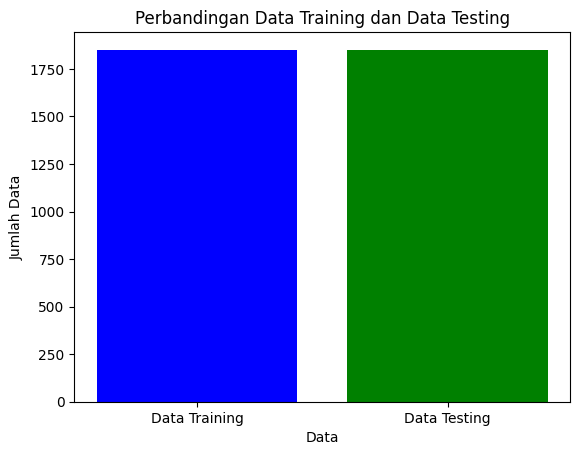

Jumlah data total : 3701
Jumlah data Training : 1850
Jumlah Data Testing : 1851


In [ ]:
import matplotlib.pyplot as plt


jml_dtr = len(X_train.index)
jml_dts = len(X_test.index)
def buat_chart_perbandingan(data1, data2, label1, label2, judul):
    # Data preparation
    labels = [label1, label2]

    # Plotting the bar chart
    plt.bar(labels, [data1, data2], color=['blue', 'green'])

    # Adding title and labels
    plt.title(judul)
    plt.xlabel('Data')
    plt.ylabel('Jumlah Data')

    # Showing the chart
    plt.show()

# Contoh penggunaan
data1 = jml_dtr
data2 = jml_dts
label1 = 'Data Training'
label2 = 'Data Testing'
judul = 'Perbandingan Data Training dan Data Testing'

buat_chart_perbandingan(data1, data2, label1, label2, judul)
print('Jumlah data total :', data1+data2)
print('Jumlah data Training :', data1)
print('Jumlah Data Testing :', data2)

In [ ]:
#melakukan cek terhadap splitting data latih dan uji dengan rasio 50:50
print(X_train.shape)
print(X_test.shape)

(1850, 14)
(1851, 14)


Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaler.fit(data)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Konfigurasi 2 Rasio 70:30

Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.3,random_state=50)

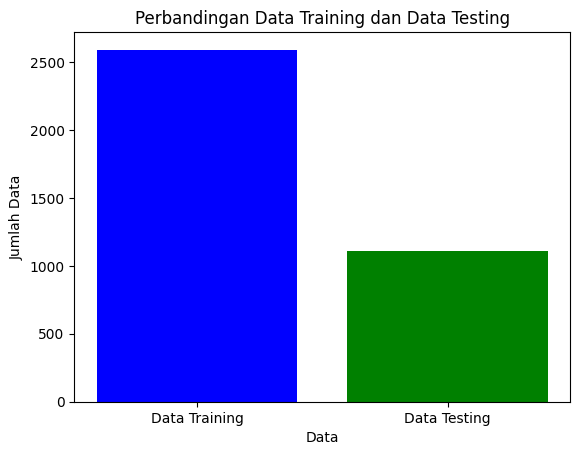

Jumlah data Training : 2590
Jumlah Data Testing : 1111


In [ ]:
import matplotlib.pyplot as plt


jml_dtr = len(X_train.index)
jml_dts = len(X_test.index)
def buat_chart_perbandingan(data1, data2, label1, label2, judul):
    # Data preparation
    labels = [label1, label2]

    # Plotting the bar chart
    plt.bar(labels, [data1, data2], color=['blue', 'green'])

    # Adding title and labels
    plt.title(judul)
    plt.xlabel('Data')
    plt.ylabel('Jumlah Data')

    # Showing the chart
    plt.show()

# Contoh penggunaan
data1 = jml_dtr
data2 = jml_dts
label1 = 'Data Training'
label2 = 'Data Testing'
judul = 'Perbandingan Data Training dan Data Testing'

buat_chart_perbandingan(data1, data2, label1, label2, judul)
print('Jumlah data Training :', data1)
print('Jumlah Data Testing :', data2)

In [ ]:
#melakukan cek terhadap splitting data latih dan uji dengan rasio 50:50
print(X_train.shape)
print(X_test.shape)

(2590, 14)
(1111, 14)


**Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaler.fit(data)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Konfigurasi 3 Rasio 90:10

Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.1,random_state=50)

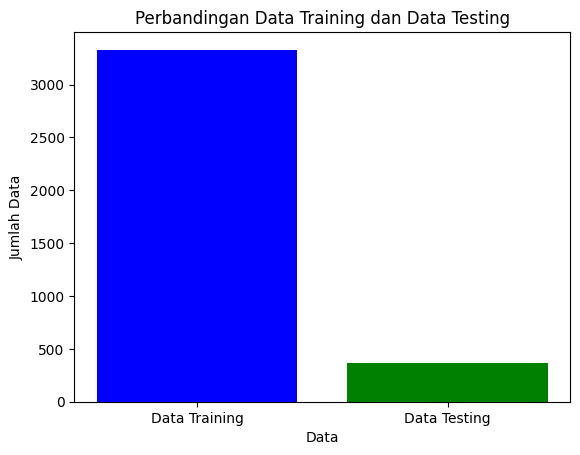

Jumlah data Training : 3330
Jumlah Data Testing : 371


In [ ]:
import matplotlib.pyplot as plt


jml_dtr = len(X_train.index)
jml_dts = len(X_test.index)
def buat_chart_perbandingan(data1, data2, label1, label2, judul):
    # Data preparation
    labels = [label1, label2]

    # Plotting the bar chart
    plt.bar(labels, [data1, data2], color=['blue', 'green'])

    # Adding title and labels
    plt.title(judul)
    plt.xlabel('Data')
    plt.ylabel('Jumlah Data')

    # Showing the chart
    plt.show()

# Contoh penggunaan
data1 = jml_dtr
data2 = jml_dts
label1 = 'Data Training'
label2 = 'Data Testing'
judul = 'Perbandingan Data Training dan Data Testing'

buat_chart_perbandingan(data1, data2, label1, label2, judul)
print('Jumlah data Training :', data1)
print('Jumlah Data Testing :', data2)

In [ ]:
#melakukan cek terhadap splitting data latih dan uji dengan rasio 50:50
print(X_train.shape)
print(X_test.shape)

(3330, 14)
(371, 14)


**Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaler.fit(data)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

**Building MLP**

# Feature Engineering

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance.

**Drawing the Correlation Matrix**

Therefore I will be performing the Correlation Coefficient checking mechanism in order to check the relationship between the different features with the output.

Each of those correlation types can exist in a spectrum represented by values from 0 to 1 where slightly or highly positive correlation features can be something like 0.5 or 0.7. If there is a strong and perfect positive correlation, then the result is represented by a correlation score value of 0.9 or 1.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.143230,-0.024264,0.009277,0.666778,0.006460,0.004706,0.000583,-0.028674,-0.014201,0.075155,0.043331,0.074054,0.123057
1,0.143230,1.000000,0.100651,-0.003422,0.141182,0.104940,0.085488,0.104828,0.099658,0.110643,0.029866,0.093515,0.082557,0.048030
2,-0.024264,0.100651,1.000000,-0.021958,-0.013975,0.059911,-0.029941,0.010055,-0.003023,-0.029192,0.062744,-0.028442,0.044650,0.023943
3,0.009277,-0.003422,-0.021958,1.000000,-0.043718,0.040025,0.021217,0.013081,0.032233,0.010053,-0.057309,0.041225,0.038085,0.023340
4,0.666778,0.141182,-0.013975,-0.043718,1.000000,-0.064837,-0.055634,-0.088974,-0.146515,-0.108304,0.049735,-0.058432,0.032177,0.076942
5,0.006460,0.104940,0.059911,0.040025,-0.064837,1.000000,0.572932,0.455735,0.689979,0.631556,0.071469,0.576262,0.464642,0.237025
6,0.004706,0.085488,-0.029941,0.021217,-0.055634,0.572932,1.000000,0.450471,0.639912,0.647225,0.092762,0.672950,0.389210,0.202226
7,0.000583,0.104828,0.010055,0.013081,-0.088974,0.455735,0.450471,1.000000,0.580283,0.540444,0.220703,0.401774,0.293093,0.228555
8,-0.028674,0.099658,-0.003023,0.032233,-0.146515,0.689979,0.639912,0.580283,1.000000,0.793942,0.092588,0.656594,0.442912,0.238116
9,-0.014201,0.110643,-0.029192,0.010053,-0.108304,0.631556,0.647225,0.540444,0.793942,1.000000,0.073599,0.669997,0.428631,0.223490


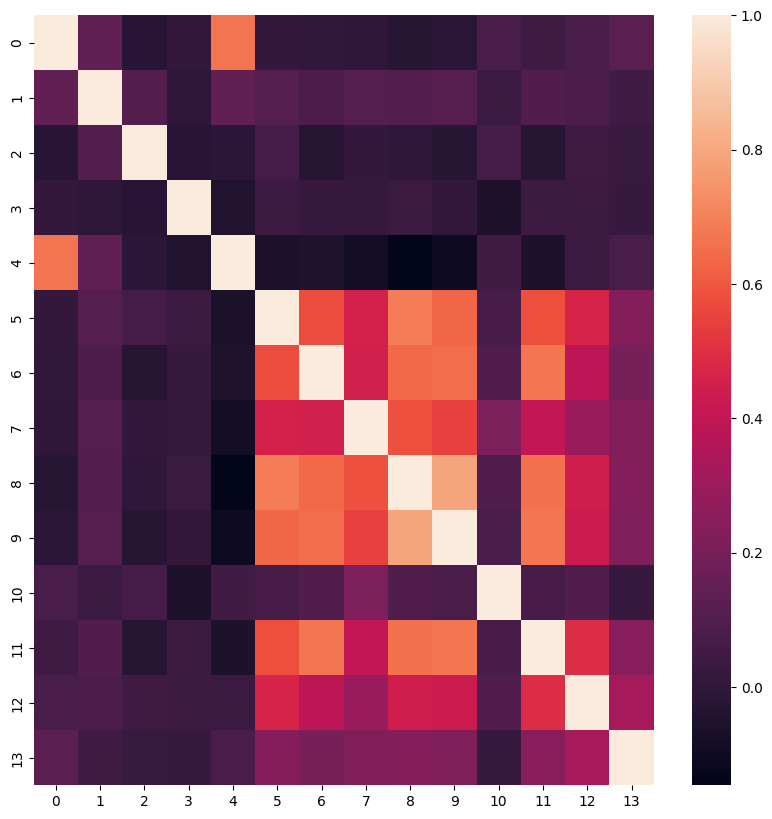

In [ ]:
import seaborn as sns
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

After generating the correlation matrix, we can see that to the right side of the matrix, there are features that has a very high correlation. We usually remove such features that have high correlations because, they are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.

It is clear that correlated features means that they bring the same information, so it is logical to remove one of them.

In order to find the exact columns that has the high correlation values, i perform the below code. I am checking the upper triangle of the correlation matrux because the uppoer and lower traingles are mirrors of each other that are divided by the diagonal in the correlation matrix. Here i am checking the columns that has correlations values more than 0.95 with the hope of removing them.

In [ ]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0        1         2         3         4         5         6         7   \
0  NaN  0.14323 -0.024264  0.009277  0.666778  0.006460  0.004706  0.000583   
1  NaN      NaN  0.100651 -0.003422  0.141182  0.104940  0.085488  0.104828   
2  NaN      NaN       NaN -0.021958 -0.013975  0.059911 -0.029941  0.010055   
3  NaN      NaN       NaN       NaN -0.043718  0.040025  0.021217  0.013081   
4  NaN      NaN       NaN       NaN       NaN -0.064837 -0.055634 -0.088974   
5  NaN      NaN       NaN       NaN       NaN       NaN  0.572932  0.455735   
6  NaN      NaN       NaN       NaN       NaN       NaN       NaN  0.450471   
7  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9  NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10 NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11 NaN      NaN       NaN       NaN       NaN       

<ipython-input-45-baf939ba7f7a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


However, after performing the above code, we can see that there are no columns that has more than 0.95 correlation and that therefore, there are no columns to be removed.

**Applying PCA**

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [ ]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.672690,1.530899,1.223481,-0.368479,-0.491925,0.839081,-1.539950,-6.129200e-01,-0.467811,-0.824610,2.163626,-1.259758,-1.417946e+00,-4.049905e-16
1,-0.672690,-1.368226,-1.061132,-0.833033,-0.082905,-1.399093,-0.173569,-6.129200e-01,-1.147395,-0.824610,-0.684435,-1.259758,-3.825556e-16,-4.049905e-16
2,1.486569,-0.401851,-1.061132,-0.917020,1.621344,-0.653035,1.192811,1.686283e-01,0.211773,1.212694,-0.474175,0.210958,-3.825556e-16,-4.049905e-16
3,-0.672690,-1.368226,1.223481,-0.255622,-1.139540,1.585140,1.192811,9.501766e-01,1.570941,1.212694,1.915138,1.681674,2.027808e+00,-4.049905e-16
4,1.486569,-1.368226,0.081174,-0.688680,0.462454,0.839081,1.192811,1.731725e+00,1.570941,1.212694,-0.684435,0.946316,1.166370e+00,1.961682e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,-0.672690,-0.401851,0.081174,0.392653,-0.900945,0.093023,1.192811,-3.470772e-16,1.570941,1.212694,-0.684435,1.681674,1.166370e+00,-4.049905e-16
1846,-0.672690,1.530899,0.081174,1.867675,-0.491925,1.585140,1.192811,1.731725e+00,1.570941,1.212694,-0.110999,1.681674,-3.825556e-16,-4.049905e-16
1847,-0.672690,1.530899,0.081174,-1.063997,-0.355585,-1.399093,-0.173569,1.686283e-01,0.891357,1.212694,0.271291,0.210958,-1.417946e+00,-4.049905e-16
1848,-0.672690,0.564524,-1.061132,0.518634,-0.082905,0.093023,-0.173569,1.686283e-01,0.211773,-0.824610,-0.952038,-0.524400,-3.825556e-16,-4.049905e-16


Here, I have not manually set the n_components of the PCA model. We want the explained variance to be between 95–99%. Therefore, i have set the PCA's n_components to 0.95

# Developing the MultiLayer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPClassifier

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50),alpha= 0.001, max_iter=100, learning_rate_init =0.02, activation='tanh', solver='adam', random_state=1)
mlp.fit(PCA_X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(50, 200, 50),
              learning_rate_init=0.02, max_iter=100, random_state=1)

In [ ]:
PCA_X_train

array([[-1.50696289, -0.13325161,  2.83945383, ...,  2.08443824,
         0.0343311 , -0.09489038],
       [-2.1785276 , -0.81296505, -0.88882023, ..., -0.6809485 ,
         0.58273191,  0.34080292],
       [ 0.85478711,  1.76017935, -1.15191922, ..., -0.82061474,
        -0.0798212 ,  0.65354141],
       ...,
       [ 0.18773583, -0.5007997 ,  1.13181657, ..., -0.47832765,
        -1.32413203,  1.06476075],
       [-0.37003309, -0.52575114, -1.05310704, ...,  0.16902826,
         0.71592937,  0.01906116],
       [-0.37298921, -0.52443939,  1.28376571, ...,  0.15140958,
         1.07123428,  0.10414499]])

**Confusion Matrix**

Using confusion matrix, we can find how many true positives, false postives, false negatives and true negatives are there.

Accuracy
0.375472717450027


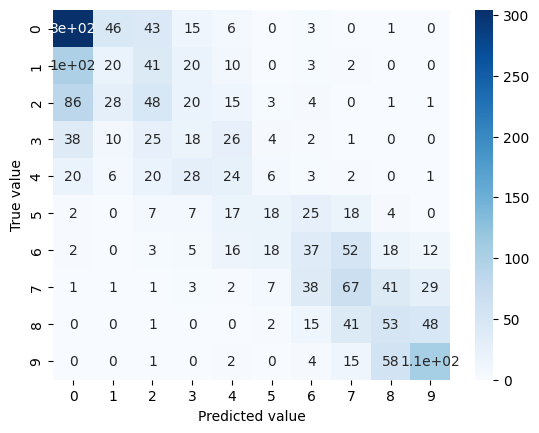

In [ ]:
print('Accuracy')
print(mlp.score(PCA_X_test, y_test))

# draw the confusion matrix
predict = mlp.predict(PCA_X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

We can find the Mean Squared Error (MSE) and other scores as follows.

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, recall_score, precision_score, f1_score

# print the training error and MSE
print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(PCA_X_train, y_train))
print("Test set score: %f" % mlp.score(PCA_X_test, y_test))
print("Accuracy score : %f" %accuracy_score(y_test, predict))
print("F1 score : %f" % f1_score(y_test, predict, average='macro'))
print("precision Score: %f" % precision_score(y_test, predict, average='macro'))
print("recall Score: %f" % recall_score(y_test, predict, average='macro'))

print("MSE: %f" % mean_squared_error(y_test, predict))

Training error: 0.537714
Training set score: 0.845405
Test set score: 0.375473
Accuracy score : 0.375473
F1 score : 0.305369
precision Score: 0.310516
recall Score: 0.309011
MSE: 2.354403
